<a href="https://colab.research.google.com/github/jparkgit/ESAA-23-2/blob/main/Week5_Frisesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [4]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

* 정밀도

In [6]:
from sklearn.metrics import precision_score
print(precision_score(y,y_pred))

0.900990099009901


* 재현율

In [5]:
from sklearn.metrics import recall_score
print(recall_score(y,y_pred))

0.8584905660377359


* F1 score

In [7]:
from sklearn.metrics import f1_score
print(f1_score(y, y_pred))

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [8]:
from sklearn.preprocessing import Binarizer
pred_proba = model_lor.predict_proba(X)
# predict_proba() 반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
# threshold = 0.1
binarizer=Binarizer(threshold=0.1)
# 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣기
y_pred2=binarizer.transform(pred_proba_1)

In [12]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
print('혼동행렬:')
print(confusion_matrix(y, y_pred2))
print('정확도: {0:.4f}'.format(accuracy_score(y,y_pred2)))
print('정밀도: {0:.4f}'.format(precision_score(y,y_pred2)))
print('재현율: {0:.4f}'.format(recall_score(y,y_pred2)))
print('f1 score: {0:.4f}'.format(f1_score(y,y_pred2)))

혼동행렬:
[[267  90]
 [  6 206]]
정확도: 0.8313
정밀도: 0.6959
재현율: 0.9717
f1 score: 0.8110


* ROC 곡선 시각화

In [19]:
from sklearn.metrics import roc_curve
#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = model_lor.predict_proba(X)[:, 1]
fprs,tprs, thresholds=roc_curve(y, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71]
샘플용 10개의 임곗값:  [1.   0.81 0.78 0.69 0.62 0.56 0.45 0.38 0.31 0.27 0.2  0.13 0.09 0.06
 0.  ]
샘플 임곗값별 FPR: [0.    0.006 0.014 0.022 0.039 0.048 0.062 0.073 0.104 0.115 0.14  0.204
 0.272 0.336 1.   ]
샘플 임곗값별 TPR: [0.005 0.717 0.741 0.802 0.811 0.835 0.877 0.91  0.925 0.943 0.953 0.967
 0.976 0.991 1.   ]


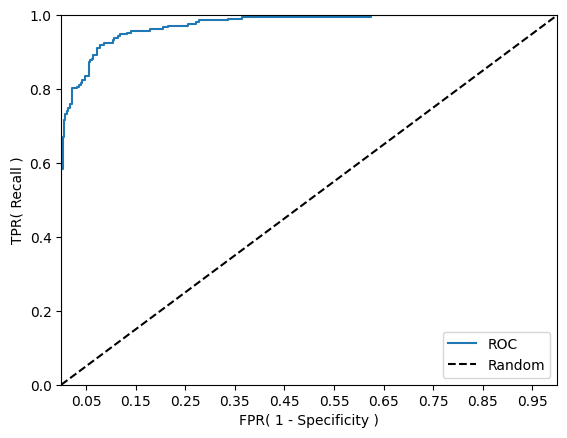

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def roc_curve_plot(y_test , pred_proba_c1):
    #임곗값에 따른 FPR, TPR 값을 반환받음
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs , tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    #FPR X 축의 scale을 0.1 단위로 변경, x, y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

roc_curve_plot(y, pred_proba_class1)

* ROC AUC 값

In [18]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score: {0:.4f}'.format(roc_auc_score(y, y_pred)))

ROC AUC score: 0.9012
